In [6]:
import torch
import torchvision
import argparse
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt
from a3_gan_template import Generator

In [7]:
args = argparse.Namespace()
args.latent_dim = 100
generator = Generator(args)
generator.load_state_dict(torch.load('../models/k=5/results/checkpoint.pth.tar', map_location='cpu')['generator'])
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [8]:
normal = torch.distributions.MultivariateNormal(torch.zeros(args.latent_dim, dtype=torch.float),
                                                    torch.eye(args.latent_dim, dtype=torch.float))

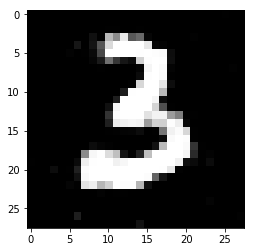

In [42]:
with torch.no_grad():
    z1 = normal.sample(torch.Size([1]))
    img1 = generator(z1)
    img1 = (img1 - img1.mean()) / img1.std()
    plt.imshow(img1.view(28,28).detach(), cmap='gray')

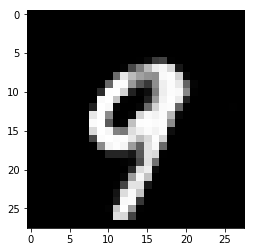

In [27]:
with torch.no_grad():
    z2 = normal.sample(torch.Size([1]))
    img2 = generator(z2)
    img2 = (img2 - img2.mean()) / img2.std()
    plt.imshow(img2.view(28,28).detach(), cmap='gray')

In [28]:
def slerp(v1: np.ndarray, v2: np.ndarray, t: np.ndarray):
    cos = np.inner(v1, v2) / (linalg.norm(v1) * linalg.norm(v2))
    omega = np.arccos(cos)
    
    first = (np.sin((1-t) * omega) / np.sin(omega)).reshape(-1,1) * v1.reshape(1,-1)
    second = (np.sin(t * omega) / np.sin(omega)).reshape(-1,1) * v2.reshape(1,-1)
    
    return first + second

In [43]:
t = np.linspace(0.1, 0.9, 7)
z1 = z1.reshape(-1)
z2 = z2.reshape(-1)
interpolations = slerp(z1, z2, t)
interpolations.shape

torch.Size([7, 100])

In [44]:
with torch.no_grad():
    imgs = generator(torch.tensor(interpolations, dtype=torch.float))
    imgs = imgs.reshape(7,1, 28,28)
imgs = torch.cat([torch.tensor(img1), imgs, torch.tensor(img2)], dim=0)
torchvision.utils.save_image(imgs, 'interpolations/3-9.png', nrow=9)